### Importamos las librerias que vamos a utilizar


In [46]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
# Ignorar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

### Importamos el dataset para el practico

In [47]:

########################################################
##INICIO DE LA PARTE A COMPLETAR
########################################################

#Aplique la ruta correcta utilizando la ubicacion en donde alojo el archivo "data.csv"
ruta_archivo = r'data.csv'

########################################################
##FIN DE LA PARTE A COMPLETAR
########################################################



# Leer el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

print(df.shape)

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar el conjunto de datos
df.sample(5)


(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
57,857793,M,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,0.4226,1.150,2.735,40.09,0.003659,0.02855,0.02572,0.01272,0.01817,0.004108,17.87,30.70,115.70,985.5,0.1368,0.42900,0.3587,0.1834,0.3698,0.10940
174,871642,B,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,0.05975,0.3309,1.925,2.155,21.98,0.008713,0.01017,0.00000,0.00000,0.03265,0.001002,11.54,19.20,73.20,408.3,0.1076,0.06791,0.0000,0.0000,0.2710,0.06164
41,855563,M,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,0.2366,1.428,1.822,16.97,0.008064,0.01764,0.02595,0.01037,0.01357,0.003040,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.1424,0.2964,0.09606
523,917896,B,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,0.3191,1.249,2.284,26.45,0.006739,0.02251,0.02086,0.01352,0.01870,0.003747,15.11,25.63,99.43,701.9,0.1425,0.25660,0.1935,0.1284,0.2849,0.09031
95,86208,M,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.4098,0.1573,0.3689,0.08368


#### A continuacion graficaremos los datos, para evaluar cuantos tumores son benignos y malignos, la idea de este practico, es evaluar si aplicando un algoritmo de CLUSTERING, podemos encontrar 2 agrupaciones o mas, que nos permitan identificar si los tumores son benignos o malignos, de acuerdo al cluster que pertenezcan.

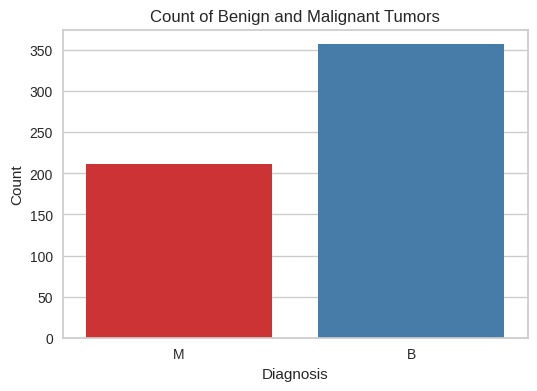

Number of Benign (B):  357
Number of Malignant (M):  212


In [48]:


# Crear un gráfico de conteo para la variable "diagnosis"
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diagnosis', data=df, palette='Set1')
ax.set(xlabel='Diagnosis', ylabel='Count', title='Count of Benign and Malignant Tumors')
plt.show()

# Obtener y mostrar el número de casos benignos (B) y malignos (M)
B, M = df['diagnosis'].value_counts()
print('Number of Benign (B): ', B)
print('Number of Malignant (M): ', M)


#### Como se observa, aproximadamente un 63% de la muestra son tumores Benignos (357 casos), frente a un 37 % aproximado (212 casos) que corresponde a tumroes malignos. Podemos concluir que se trata de un dataset balanceado (no hay igualdad de "clases" pero tenemos suficientes casos de cada una).

##### Remplazamos el TARGET B y M, por 0 Y 1 respectivamente, para mas adelante realizar una Confusion Matrix y evaluar los resultados, de forma simple. A continuacion eliminamos las 2 columnas ID ya que no es un campo relevante para el algoritmo y el campo diagnosis que es el TARGET, o campo que utlizaremos para contrastar resultados, el foco de este practico es confirmar si los clusteres detectados permiten separar los 2 tipos de tumores.

In [49]:
# Convertir las etiquetas de "diagnosis" a números (0 y 1) para mas adelante hacer una Confusion Matrix
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Eliminar las columnas "diagnosis" e "id" del conjunto de características, solo dejamos las variables sin ningun target que permita identificar de antemano que tipo de tumor es
X = df.drop(['diagnosis', 'id'], axis=1)

X.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.2100,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,0.1903,0.06422,0.1988,0.4960,1.218,12.26,0.006040,0.005656,0.00000,0.000000,0.02277,0.003220,10.62,14.10,66.53,342.9,0.1234,0.07204,0.00000,0.00000,0.3105,0.08151
364,13.400,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,0.05701,0.1584,0.6124,1.036,13.22,0.004394,0.012500,0.01451,0.005484,0.01291,0.002074,14.73,21.70,93.76,663.5,0.1213,0.16760,0.13640,0.06987,0.2741,0.07582
300,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,1.1110,1.1610,7.237,133.00,0.006056,0.032030,0.05638,0.017330,0.01884,0.004787,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.61210,0.19800,0.2968,0.09929
511,14.810,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.02541,0.1659,0.05348,0.2182,0.6232,1.677,20.72,0.006708,0.011970,0.01482,0.010560,0.01580,0.001779,15.61,17.58,101.70,760.2,0.1139,0.10110,0.11010,0.07955,0.2334,0.06142


#FASE 1: ESTANDARIZAR LAS VARIABLES (obligatorio)

#### Estandarizamos las caracteristicas, para más adelante aplicar K-Means y que todas estén expresadas en la misma escala


In [50]:
# Estandarizar las características para el K-Means
#Escalar X y generar el vector llamado X_scaled
scaler = StandardScaler()





########################################################
##INICIO DE LA PARTE A COMPLETAR
########################################################

#Aplicar funcion para Escalar X y asginar el resultado a X_scaled
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)
X_scaled = x_scaled

########################################################
##FIN DE LA PARTE A COMPLETAR
########################################################






#Visualizamos el vector con los datos escalados
print(X_scaled[:2])

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  \
0                2.255747   2.489734   -0.565265      2.833031  2.487578   
1               -0.868652   0.499255   -0.876244      0.263327  0.742402   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0      -0.214002        1.316862      0.724026           0.660820   
1      -0.605351       -0.692926     -0.440780           0.260162   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     1.148757              0.907083   

#FASE 2: MÉTODO K-MEANS. MÉTODO ELBOW Y MÉTODO SILUETA (obligatorio)

#### A continuacion realizaremos varias iteraciones con el algoritmo K-means, para poder visualizar con el metodo de elbow, cual es el mejor valor de K, para este conjunto de datos.

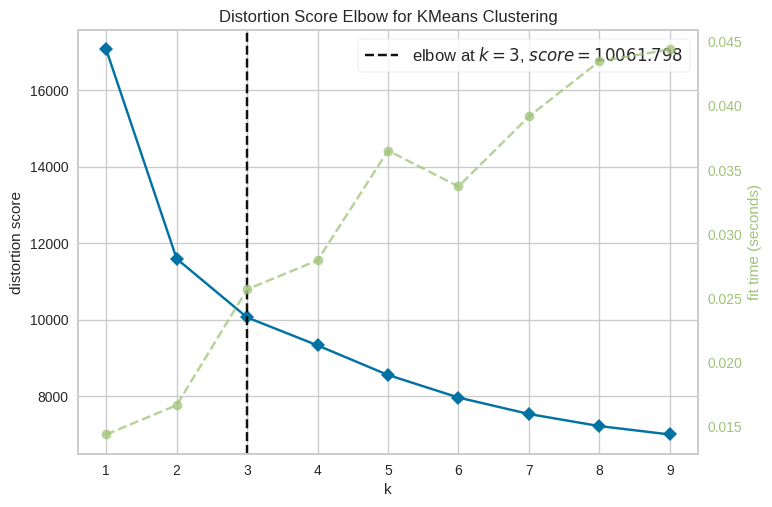

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# Instantiate the clustering model and visualizer
seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure



##### Aplicamos el método de ELBOW, y el resultado es que recomienda utilizar un valor de k=3, sin embargo visiblemente el codo se marca mejor con un k=2, además como ya sabemos de antemano que hay 2 tipos de tumores benignos y malignos, vamos a trabajar y considerar 2 grandes grupos, para más adelante contrastar, si los grupos identificados por el algoritmo, estan alineados a los 2 tipos de tumores.


#### A continuación vamos a aplicar el método de la silueta para entender qué valor de K es más conveniente. Esperemos que sean 2.

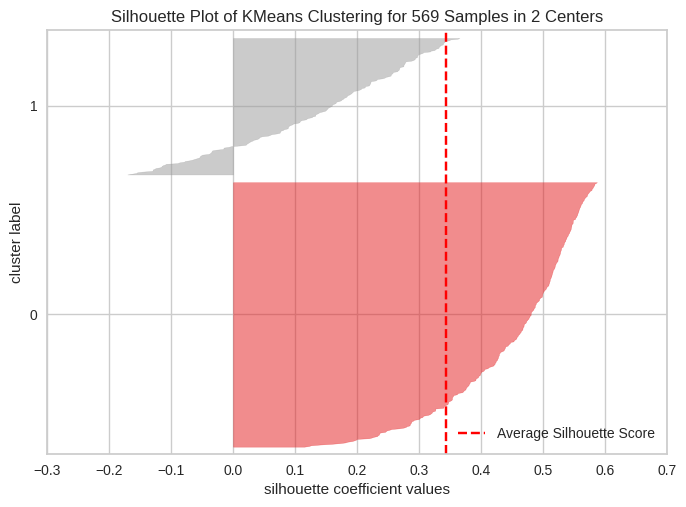

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:

nclusters = 2
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

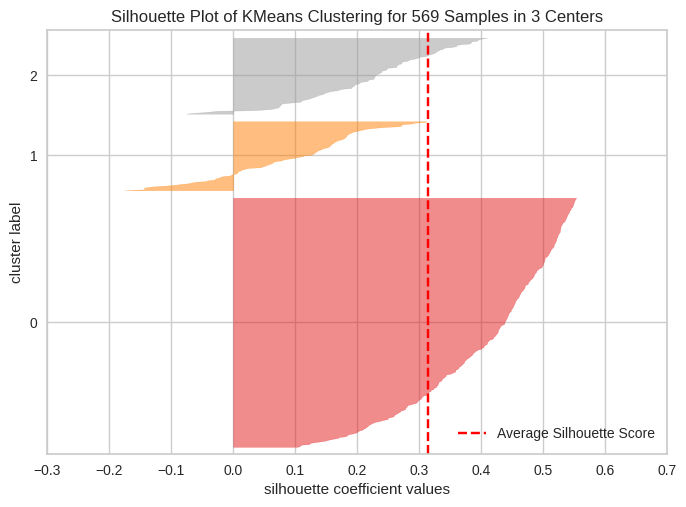

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

##### Luego de aplicar el método de la SILUETA confirmamos que 2 clusteres, es lo adecuado. Confirmando el análisis visual del metodo de elbow.

##### A conitnuación aplicaremos K-means, y luego una transformación simple, ya que K-means, asigna nombres aleatoriamente a los clusters detectados. Necesitamos forzar a que el CLUSTER MAYORITARIO el de mayor cantidad de elementos se le asigne el valor 0 y al minoritario 1. Para ir en linea, con el campo TARGET, ya que como confirmamos al inicio del análisis, identificamos que el grupo minoritario de tumores, son los del tipo maligno, por lo tanto le asignaremos el valor 1. Para que luego cuando utilicemos la matriz de confusion, se pueda considerar una coincidencia cuando ambos valores sean 1 o 0.

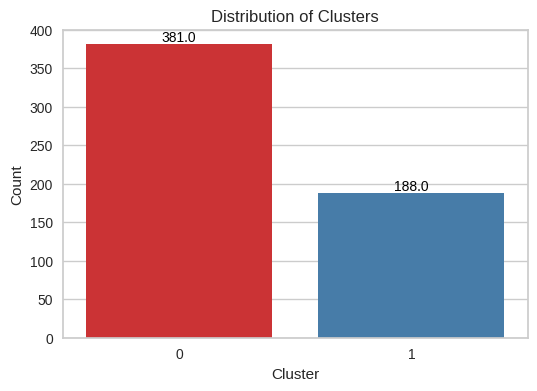

In [54]:
########################################################
##INICIO DE LA PARTE A COMPLETAR
########################################################

# Crear el modelo de K-Means con 2 clusters (benigno y maligno) ademas tiene mejor puntaje de SILUETA
# Utilizar kMeans con la variables n_clusters=2 a "X_scaled" y alojar el resultado en "df['cluster']" utilizando el metodo fit_predict





########################################################
##FIN DE LA PARTE A COMPLETAR
########################################################


kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

tamano_clusters = df['cluster'].value_counts()

cluster_mayoritario = tamano_clusters.idxmax()


# Obtener el tamaño de cada cluster
tamano_clusters = df['cluster'].value_counts()

# Determinar el cluster mayoritario
cluster_mayoritario = tamano_clusters.idxmax()

# Asignar etiquetas basadas en el cluster mayoritario
df['cluster'] = df['cluster'].apply(lambda x: 0 if x == cluster_mayoritario else 1)


# Crear un gráfico de barras para la distribución de clusters
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='cluster', data=df, palette='Set1')

# Agregar etiquetas con los números correspondientes a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()



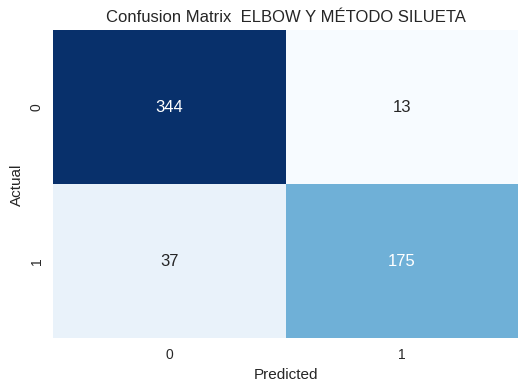

In [55]:

# Crear una matriz de confusión para comparar con el campo "diagnosis"
conf_matrix = confusion_matrix(df['diagnosis'], df['cluster'])

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  ELBOW Y MÉTODO SILUETA')
plt.show()

#### La matriz de Confusion, presenta un MUY BUEN resultado, la mayoria de los casos estan bien clasificados, lo que indica que cada tipo de tumor, tiene caracteristicas muy distintivas que hacen que cada tipo de tumor sea muy identificable y pertenezca a un cluter especifico.


# FASE 3: REDUCCIÓN DE DIMENSIONALIDAD - PCA VS T-SNE (obligatorio)

##### A continuacion aplicaremos PCA para poder visualizar en un grafico de 2 dimensiones los puntos, y poder pintar con colores diferentes cada cluster.

In [56]:
########################################################
##INICIO DE LA PARTE A COMPLETAR
########################################################

# Aplicar PCA para reducir la dimensionalidad a 2 componentes, para mejorar el entrenamiento y visualizar clusters
# Utilizar la libreria PCA con (n_components=2), aplicarlo a "X_scaled" y alojar el resultado en "X_pca"



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
tamano_clusters = df['cluster'].value_counts()
df['cluster'] = df['cluster'].apply(lambda x: 0 if x == cluster_mayoritario else 1)

# Determinar el cluster mayoritario
cluster_mayoritario = tamano_clusters.idxmax()

########################################################
##FIN DE LA PARTE A COMPLETAR
########################################################



# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)


Varianza explicada por cada componente principal: [0.44272026 0.18971182]


##### Se puede observar que la varianza capturada con 2 componenentes principales es del 63% un valor bastante bajo, quiere decir que no representan fielmente a las originales, de todos modos vamos a visualizar los puntos. como valor agregado podrian utilizar un grafico 3D para lograr una mayor captura de varianza, y tener una visualizacion de los puntos mas confiable.

In [57]:
# Crear un DataFrame con las nuevas variables PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

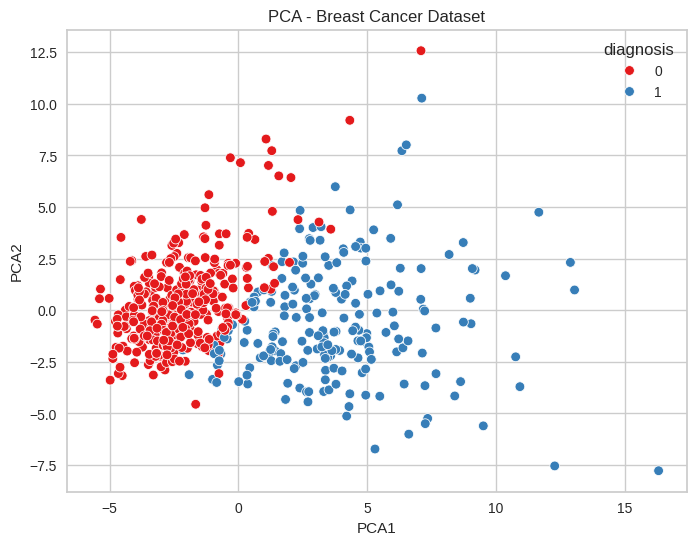

In [58]:
# Añadir la columna "diagnosis" al DataFrame PCA
df_pca['diagnosis'] = df['diagnosis']

# Visualizar el resultado en un scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='diagnosis', data=df_pca, palette='Set1')
plt.title('PCA - Breast Cancer Dataset')
plt.show()

##### A pesar del bajo grado de explicabilidad, se visualizan 2 clusters separados por una linea IMAGINARIA, no se detecta un espacio que los diferencie claramente.

In [59]:
# Seleccionar las nuevas características PCA para clustering
X_pca_for_clustering = df_pca[['PCA1', 'PCA2']]

In [60]:
########################################################
##INICIO DE LA PARTE A COMPLETAR
########################################################

# Crear el modelo de K-Means con 2 clusters
# Utilizar kMeans con la variables n_clusters=2 a "X_pca_for_clustering" y alojar el resultado en "df_pca['cluster_pca']" utilizando el metodo fit_predict
# La idea es aplicar nuevamente K-means como antes, pero en vez utilizarlo en "X_scaled", lo aplicaremos directamente en "X_pca_for_clustering", que tiene solo
# 2 componentes luego de aplicar PCA, buscando mejorar los resultados y tiempos de ejecucion.


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_for_clustering = X_pca

kmeans_pca = KMeans(n_clusters=2, random_state=42)
df_pca['cluster_pca'] = kmeans_pca.fit_predict(X_pca_for_clustering)


########################################################
##FIN DE LA PARTE A COMPLETAR
########################################################





# Obtener el tamaño de cada cluster
tamano_clusters = df_pca['cluster_pca'].value_counts()

# Determinar el cluster mayoritario
cluster_mayoritario = tamano_clusters.idxmax()

# Asignar etiquetas basadas en el cluster mayoritario
df_pca['cluster_pca'] = df_pca['cluster_pca'].apply(lambda x: 0 if x == cluster_mayoritario else 1)

# Mostrar el resultado
print(df_pca['cluster_pca'].value_counts())



cluster_pca
0    378
1    191
Name: count, dtype: int64


##### Aplicamos nuevamente clustering, pero ahora en vez de trabajar con todo el dataset escalado, direcamente utilizamos las 2 componenentes principales identificadas, con esto queremos validar si obtenemos un mejor resultado, y en menor tiempo de ejecucion. Para validar si es verdad las ventajas que promete PCA, a la hora de entrenar algoritmos.  Como punto extra podria realizar mediciones del tiempo de entrenamiento de ambos algoritmos, entrenando un modelo k-means con 2 componentes principales vs trabajar con las variables originales que son muchas mas.

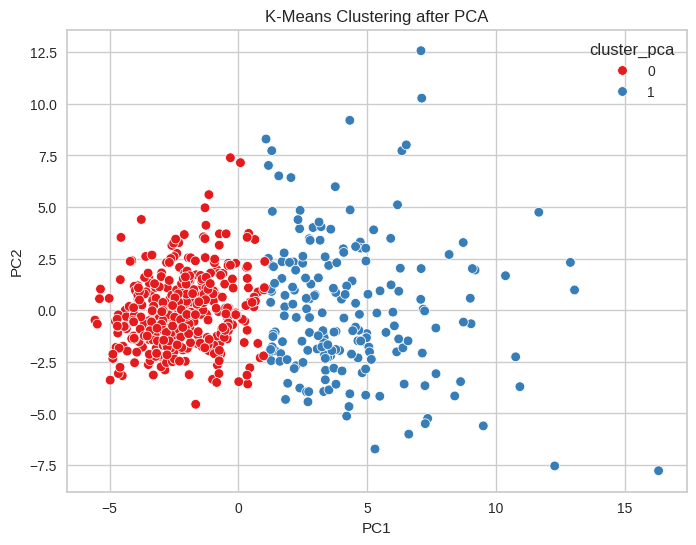

In [61]:
# Visualizar el resultado en un scatter plot con los clusters de K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_pca', data=df_pca, palette='Set1', legend='full')
plt.title('K-Means Clustering after PCA')
plt.show()

In [62]:
df_pca.sample(20)

,PC1,PC2,cluster_pca
259,3.691318,1.065646,1
73,-0.361709,0.119739,0
240,-2.227721,-1.215000,0
280,4.960268,-1.341123,1
70,2.704596,-4.437142,1
117,3.110528,1.569390,1
189,-3.357304,-1.103732,0
39,0.765264,0.886244,0
26,3.510263,2.171625,1
326,-3.149654,-1.771248,0


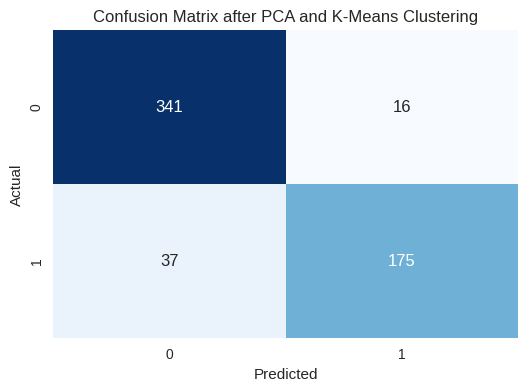

In [63]:
# Crear una matriz de confusión para comparar los clusters con el campo "diagnosis"
df_pca['diagnosis'] = df['diagnosis'].values
conf_matrix_pca = confusion_matrix(df_pca['diagnosis'], df_pca['cluster_pca'])

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_pca, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after PCA and K-Means Clustering')
plt.show()


##### Cuando analizamos la precision con PCA, logramos una MEJORA MINIMA, practicamente es el mismo resultado, en este caso, no logramos una mejora sustancia en el resultado, pero seguramente si se tratara de un volumen muy grande de datos, seria mejor entrenar el modelo con las nuevas variables, ya que el algoritmo logra practicamente el mismo resultado.  Por otro lado utilizar 3 componentes podria generar alcanzar un mejor resultado, ya que confirmamos que las 2 componentes principales, no representan con gran fiabilidad a las originales.

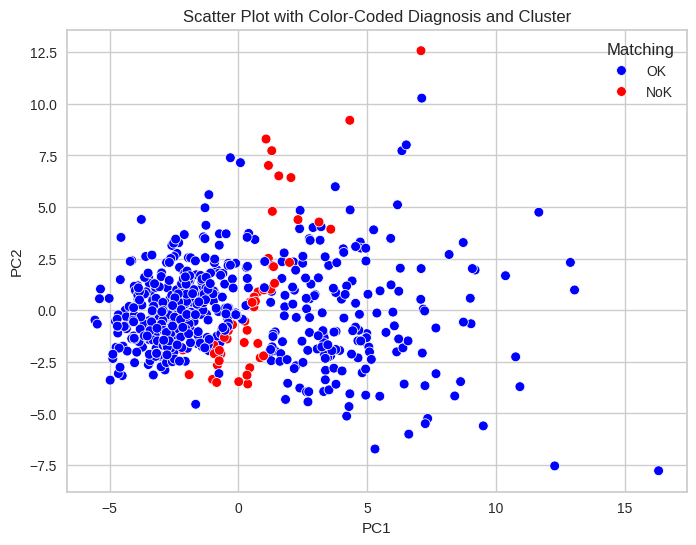

In [64]:
# Verificar si diagnosis está en df_pca
if 'diagnosis' not in df_pca.columns:
    df_pca['diagnosis'] = df['diagnosis'].values  # Agregar si falta

# Crear una nueva columna que indica coincidencias
df_pca['match'] = df_pca.apply(lambda row: 'OK' if row['diagnosis'] == row['cluster_pca'] else 'NoK', axis=1)

# Crear scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='match', palette={'OK': 'blue', 'NoK': 'red'}, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot with Color-Coded Diagnosis and Cluster')
plt.legend(title='Matching')
plt.show()


##### En este grafico marcamos en ROJO los casos mal clasificados, y realmente es algo esperable, ya que son casos que se encuentran en la division de los 2 clusters, por lo tanto, existian grandes posibilidades de que sean mal clasificados, un punto importante aqui, seria evaluar otro metodo de reduccion de dimensionalidad, que separe mas los puntos o evaluar otro algoritmo de clustering para confirmar si se arriba a mejores resultados.  Tambien se podria evaluar trabajar con mas componentes principales, ya que la representatividad de solo 2 componentes es baja. Aqui se compara el TARGET orginal vs Cluster identificado.

##### De todos modos considero, que el algoritmo de CLUSTERING logro un RESULTADO EXCELENTE, clasificando la mayoria de los casos de forma correcta de los 569 casos, 516 fueron clasificados correctamente. Logrando una precision del 90.6%

##### Lo mas interesante de esto, es que el problema encontro una solucion utilizando un algoritmo de CLUSTERING, y seria util en el caso de datos NO ETIQUETADOS. Aqui solo usamos las etiquetas, para que se pueda realizar una comparacion entre el resultado obtenido, y una clasificacion real.


In [65]:
# Aplicar TSNE para reducir la dimensionalidad a 2 componentes, para mejorar el entrenamiento y visualizar clusters

from sklearn.manifold import TSNE



########################################################
##INICIO DE LA PARTE A COMPLETAR
########################################################

# Aplicar t-SNE para reducir la dimensionalidad a 2 componentes, para mejorar el entrenamiento y visualizar clusters, similar a PCA, pero ahora aplicamos otro algoritmo
# Utilizar la libreria TSNE con (n_components=2), aplicarlo a "X_scaled" y alojar el resultado en "X_tsne"
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

########################################################
##FIN DE LA PARTE A COMPLETAR
########################################################






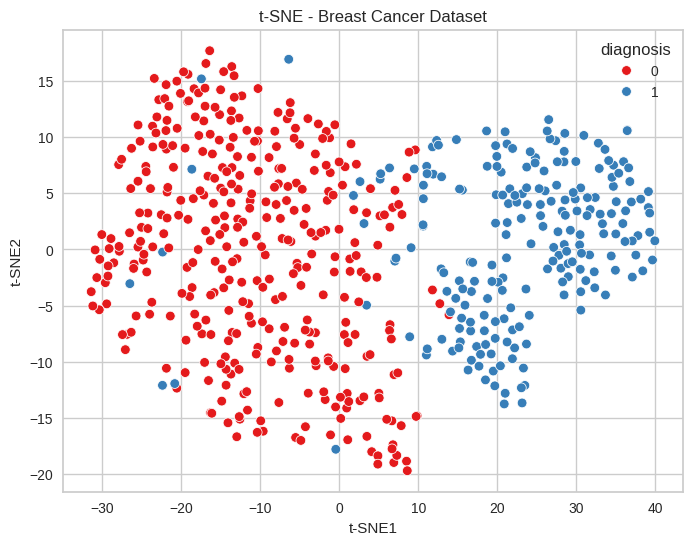

In [66]:


# Crear un DataFrame con las nuevas variables t-SNE
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])

# Añadir la columna "diagnosis" al DataFrame t-SNE
df_tsne['diagnosis'] = df['diagnosis']

# Visualizar el resultado en un scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='diagnosis', data=df_tsne, palette='Set1')
plt.title('t-SNE - Breast Cancer Dataset')
plt.show()



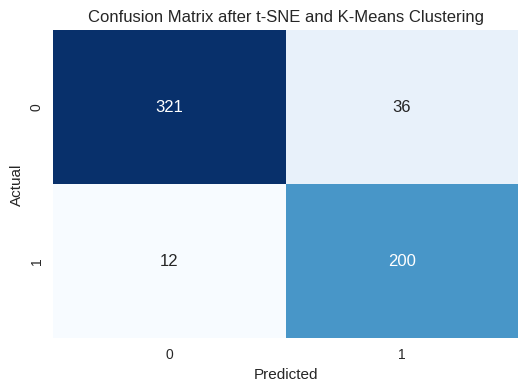

In [67]:
# Seleccionar las nuevas características t-SNE para clustering
X_tsne_for_clustering = df_tsne[['t-SNE1', 't-SNE2']]

# Crear el modelo de K-Means con 2 clusters
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
df_tsne['cluster_tsne'] = kmeans_tsne.fit_predict(X_tsne_for_clustering)

# Obtener el tamaño de cada cluster
tamano_clusters_tsne = df_tsne['cluster_tsne'].value_counts()

# Determinar el cluster mayoritario
cluster_mayoritario_tsne = tamano_clusters_tsne.idxmax()

# Asignar etiquetas basadas en el cluster mayoritario
df_tsne['cluster_tsne'] = df_tsne['cluster_tsne'].apply(lambda x: 0 if x == cluster_mayoritario_tsne else 1)


# Crear una matriz de confusión para comparar los clusters con el campo "diagnosis"
conf_matrix_tsne = confusion_matrix(df_tsne['diagnosis'], df_tsne['cluster_tsne'])

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tsne, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after t-SNE and K-Means Clustering')
plt.show()


#FASE4: CONCLUSIONES (obligatorio)

#### A continuacion debe:

##### Incluir las CONCLUSIONES, sobre el analisis y el desarrollo aqui expuesto (Necesario - obligatorio)


########################################################
##INICIO DE LA PARTE A COMPLETAR
########################################################


##### Incluir sus CONCLUSIONES, sobre el analisis y el desarrollo aqui expuesto (Necesario)

* **Elbow y Método de la Silueta:**

Se obtuvo una buena clasificación con una precisión alta.

La mayoría de los tumores fueron bien agrupados en los clusters correspondientes, lo que indica que las características utilizadas permiten diferenciar entre las clases con claridad.

Sin embargo, hubo algunos errores de clasificación, con 13 y 37 muestras mal asignadas.

* *PCA + K-Means Clustering:**

Hubo una mejora mínima respecto al método anterior, con una ligera reducción de errores en la clase 0 (de 13 a 16 errores).

Se evidencia que usar únicamente dos componentes principales no es suficiente para mejorar sustancialmente la clasificación.

Se podría probar con tres o más componentes principales para evaluar si el rendimiento mejora.

* **t-SNE + K-Means Clustering:**

Se observa una mejora significativa en la clase 1, donde se reducen los falsos negativos de 37 a 12.

Sin embargo, en la clase 0, aumentaron los falsos positivos (de 16 a 36).

Parece que el método t-SNE logra capturar mejor la estructura de los datos en la clase 1, pero a costa de mayor confusión en la clase 0.

** **  


  **##### Profundizar aplicando otros algoritmos de CLUSTERING y reduccion de dimensionalidad, para intentar encontrar un mejor resultado (Opcional)**


**Posible soluciones:**

* otros algoritmos de clustering como DBSCAN o Agglomerative Clustering para verificar si pueden mejorar la separación de grupos.



* Técnicas de reducción de dimensionalidad, como UMAP  para preservar la estructura de los datos.

* Ajustar hiperparámetros de K-Means y los métodos de reducción de dimensionalidad para optimizar la agrupación.

* Evaluar combinaciones de múltiples métodos (por ejemplo, PCA seguido de t-SNE) para verificar si se obtiene un mejor desempeño.

########################################################
##FIN DE LA PARTE A COMPLETAR
########################################################

#FASE ADICIONAL - OPTATIVA

##### Profundizar aplicando otros algoritmos de CLUSTERING y reduccion de dimensionalidad, para intentar encontrar un mejor resultado (Opcional)

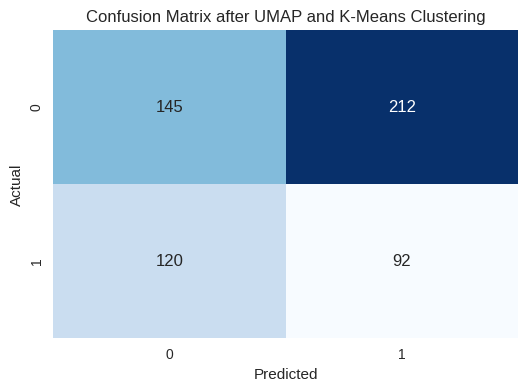

In [68]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Aplicar UMAP para reducción de dimensionalidad a 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Aplicar K-Means con 2 clusters (asumiendo que hay dos clases)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster_umap'] = kmeans.fit_predict(X_umap)

# Crear la matriz de confusión
conf_matrix_umap = confusion_matrix(y, df['cluster_umap'])

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_umap, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after UMAP and K-Means Clustering')
plt.show()


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
import pandas as pd

# Suponiendo que 'df' es tu DataFrame con las características y la columna 'diagnosis'
X = df.drop(columns=['diagnosis'])  # Eliminar la variable objetivo
y = df['diagnosis']  # Variable de clase real

# Aplicar DBSCAN para clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X)

# Filtrar valores -1 (outliers detectados por DBSCAN)
df_filtered = df[df['cluster_dbscan'] != -1]
y_filtered = y[df['cluster_dbscan'] != -1]

# Crear la matriz de confusión
conf_matrix_dbscan = confusion_matrix(y_filtered, df_filtered['cluster_dbscan'])

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dbscan, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after DBSCAN Clustering')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 600x400 with 0 Axes>